In [4]:
#!/usr/bin/env python

import sys, os
import numpy as np
from random import uniform
import math
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/opt/python/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
def regression_gradient(train_X, train_Y, capacity, step_size, n_steps):
    """
    Question 1.
    ridge regression with gradient descent.
    """
    
    # if train_X is a vector, add dummy dimension
    if np.ndim(train_X) == 1:
        train_X = np.expand_dims(train_X, axis=1)
        
    n = np.shape(train_X)[0]
    d = np.shape(train_X)[1]
    
    w = np.zeros((d + 1)) #includes b at position 0
    
    #We modify the dataset to include b. To do so, we add an column of 1s at the begining of train_X matrix
    train_X_modif = np.ones((n,d + 1))
    train_X_modif[:,1:] = train_X  

    empirical_risk = np.zeros((d + 1))
    for i in range(n_steps):
        for j in range(n):
            empirical_risk += np.dot(train_X_modif[j], (np.dot(w.T,train_X_modif[j]) - train_Y[j]))
        empirical_risk = empirical_risk / n
        regularization = (capacity * 2 * w) / n
        gradient_descent = empirical_risk + regularization
        w = w - (step_size  * gradient_descent)
    
    return w


In [6]:
#--------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------TEST-------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
iris= np.loadtxt('iris.txt')
train_X = iris[:, :-1]
train_Y = iris[:, -1]

print(regression_gradient(train_X, train_Y, 0.005, 0.01, 10))


[0.02729382 0.18265299 0.07246812 0.1745165  0.06522132]


In [7]:
def sample_h(n):
    """
    Question 2.
    h(x) = sin(x) + 0.3x -1
    Returns dataset D (x, h(x)) with n points. x in [-5, 5].
    """
    D = np.zeros((n,2))
    for i in range(n):
        D[i,0] = uniform(-5,5)
        D[i,1] = math.sin(D[i,0]) + 0.3*(D[i,0]) - 1
    return D

Text(0,0.5,'Predicted value')

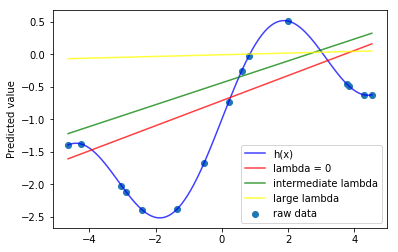

In [8]:
#--------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------QUESTION 3-------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------

n_bins = 100
D= sample_h(15)
w1 = regression_gradient(D[:,0], D[:,1], 0, 0.005, 200)
b1= w1[0]
w1= w1[1:]
axes_min = np.min(D[:,0])
axes_max = np.max(D[:,0])
alpha=0.75
x = np.atleast_2d(np.linspace(axes_min, axes_max, n_bins)).T

#Raw data
plt.scatter(D[:,0], D[:,1])

#Plot h(x)
y1 = np.zeros(n_bins)
for i in range(n_bins):
    y1[i] = math.sin(x[i]) + 0.3*(x[i]) - 1
plt.plot(x, y1, color='blue', alpha=alpha)

#plot regression_gradient
y2 = np.zeros(n_bins)
for j in range(n_bins):
    y2[j] = np.dot(w1.T, x[j]) + b1
plt.plot(x, y2, color='red', alpha=alpha)


#--------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------QUESTION 4-------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
#plot regression_gradient - lamba intermediate
w2 = regression_gradient(D[:,0], D[:,1], 10 , 0.005, 200)
b2= w2[0]
w2= w2[1:]
y3 = np.zeros(n_bins)
for j in range(n_bins):
    y3[j] = np.dot(w2.T, x[j]) + b2
plt.plot(x, y3, color='green', alpha=alpha)

#plot regression_gradient - large lambda
w3 = regression_gradient(D[:,0], D[:,1], 1000 , 0.005, 200)
b3= w3[0]
w3= w3[1:]
y4 = np.zeros(n_bins)
for j in range(n_bins):
    y4[j] = np.dot(w3.T, x[j]) + b3
plt.plot(x, y4, color='yellow', alpha=alpha)


plt.legend(['h(x)',
            'lambda = 0',
            'intermediate lambda',
            'large lambda',
            'raw data'])

plt.ylabel('Predicted value')

Text(0.5,0,'Capacity')

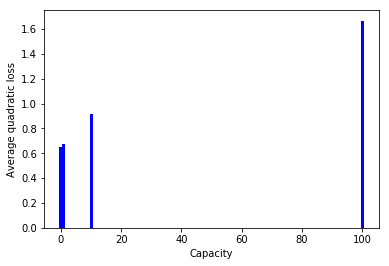

In [9]:
#--------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------QUESTION 5-------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
n_bins = 100
axes_min = np.min(D[:,0])-1
axes_max = np.max(D[:,0])+1
alpha=0.75
x = np.atleast_2d(np.linspace(axes_min, axes_max, n_bins)).T

D_test = sample_h(100)
capacity = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

avg_loss = np.zeros(len(capacity))
for i in range(len(capacity)):
    loss = 0
    w5 = regression_gradient(D[:,0], D[:,1], capacity[i] , 0.005, 200)
    b5= w5[0]
    w5= w5[1:]
    for j in range(len(D_test)):
        loss += (np.take(((np.dot(w5.T, D_test[j,0]) + b5) - D_test[j,1]), 0))**2
    avg_loss[i] = loss/len(D_test)

#Bar plot of average quadratic loss depending on the capacity (lambda) of the model
width = 1.0
plt.bar(capacity, avg_loss, width, color='b' )
plt.ylabel('Average quadratic loss')
plt.xlabel('Capacity')

Text(0,0.5,'Predicted value')

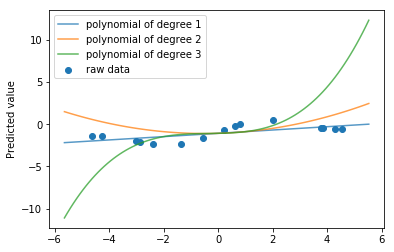

In [11]:
#--------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------QUESTION 6-------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
capacity = 0.01
step_size = 0.0001
n_steps = 100000
l =[1,2,3]
for i in range(len(l)):
    #Polynomial preprocessing
    poly = np.zeros((np.shape(D)[0], l[i]))
    for j in range(np.shape(D)[0]):
        poly[j] = np.array([D[j,0]**exp for exp in range(1,np.take(l[:i+1],0)+1)])
    
    #Ridge regression
    w6 = regression_gradient(poly, D[:,1], capacity , step_size, n_steps)
    b6= w6[0]
    w6= w6[1:]
    
    #ploting f learned with ridge regression
    y6 = np.zeros(n_bins)
    for z in range(n_bins):
        processed_x = np.array([x[z]**exp for exp in l[:i+1]])
        y6[z] = np.dot(w6.T, processed_x) + b6
    plt.plot(x, y6 , alpha=alpha)

#Raw data
plt.scatter(D[:,0], D[:,1])  

plt.legend(['polynomial of degree 1',
            'polynomial of degree 2',
            'polynomial of degree 3',
            'raw data'])

plt.ylabel('Predicted value')
